## Zebrafish_Mature miRNA Seed Heatmap
The purpose of this project is to show the abundance of miRNA seeds present in zebrafish. All known miRNA strands are listed in the file dre_mature, which contains an ID and a 23 character long sequence. The sequence of note is the characters from positions [1,7], which act as a 'zipper', or seed, that clips to strands of Poly(A) in the zebrafish genome. Many different miRNA have the same seed, and we therefore want to display the frequency of those seeds. 

In [5]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
from numpy import loadtxt

from collections import Counter

from sklearn import preprocessing

SIZE = 7
def sequence_count(string, dictionary):
    for i in range(len(string)-(SIZE-1)):
        temp_seq = string[i:i+(SIZE)]
        dictionary[temp_seq]+= 1
    return dictionary

def print_map(filename, map_):
    df=pd.DataFrame(map_)
    df.to_csv(filename+'.csv', index= False, header = False)



The first step it to take the dre_mature.txt and return a list of seeds. They are saved into file "dre_mature_seeds.txt"

In [2]:
from numpy import loadtxt
import pandas as pd
def getSeed(filename, x1, x2):
    #import file
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")
    
    #substring from x1, x2
    filename_data = [sub[x1:x2] for sub in filename_data]

    return filename_data

def print_text(filename, arr):
    with open(filename+".txt", "w+") as file:
        for item in arr:
            file.write("%s\n" % item)
    file.close()

print_text("dre_mature_seeds", getSeed("dre_mature", 1,8))

Using the 7seq map from the Zebrafish Seed Match project, we can create a heatmap with the abundance of seeds. 

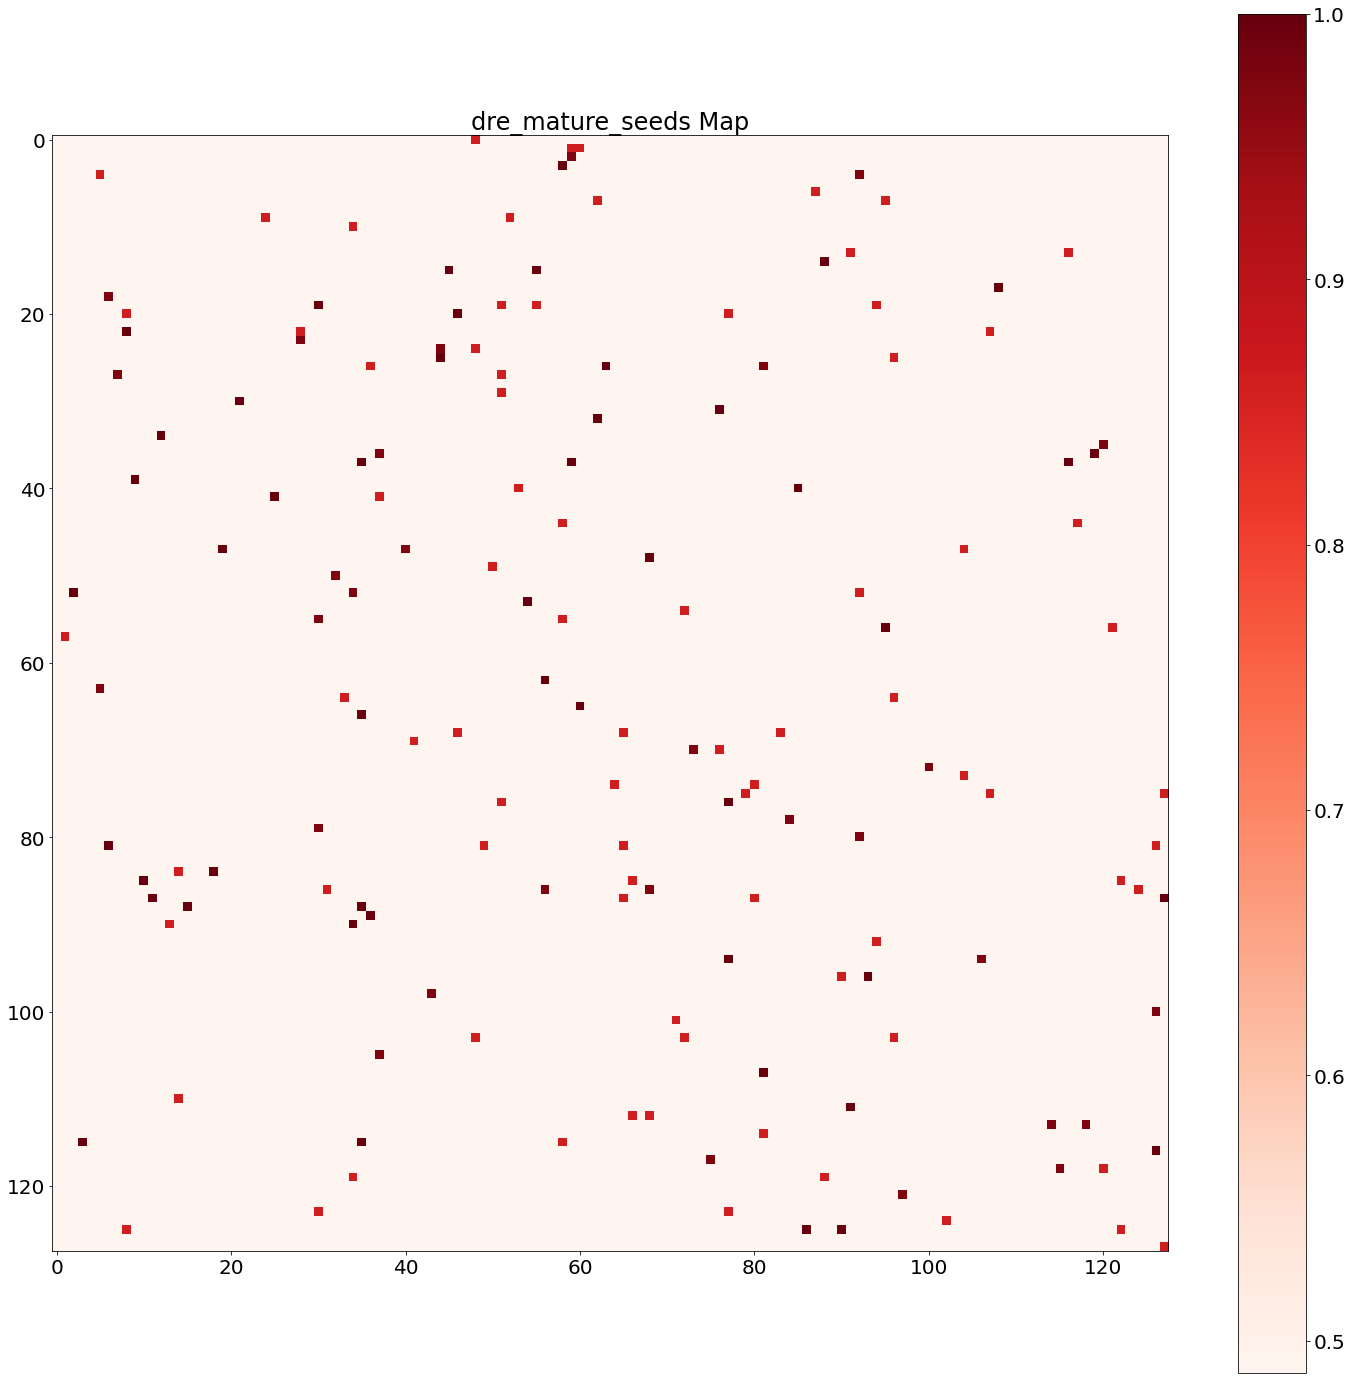

In [9]:

def make_map(filename):
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")
    
   
    #create the dictionary
    df = pd.read_csv("AGTC-7seq.csv", header = None)
    data_arr = np.array(df).flatten()

    data_dict = {data_arr[i]: 0 for i in range(0, len(data_arr))}

    #Update the dictionary:
    for i in filename_data:
        data_dict= sequence_count(i,data_dict)

    #Convert dictionary back into 1D array
    data_arr1 = np.array(list(data_dict.values()))

    #Convert 1D array back into a 2D array
    data_arr2 = np.reshape(data_arr1, (2**SIZE,2**SIZE))

    #save the map as a csv
    print_map(filename+"_map", data_arr2)

    #map 2D array
    df = pd.read_csv(filename+"_map.csv", header = None)
    data = np.array(df)

    #standardized the data with mean and std, then putting it through a sigmoid function 
    def sigmoid(x):
        e = np.exp(1)
        y = 1/(1+e**(-x))
        return y

    data = (data - data.mean())/(data.std())
    
    data = sigmoid(data)

    fig = plt.figure(figsize=(25,25))
    plt.imshow(data,cmap="Reds")
    plt.rc('font', size=20)
    plt.title(filename+" Map")
    plt.colorbar()
    plt.savefig(filename+" Map")
    plt.show()
    
make_map("dre_mature_seeds")